In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier


df = pd.read_csv("htd.csv")

df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.isnull().sum()

df["target"].value_counts()

df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


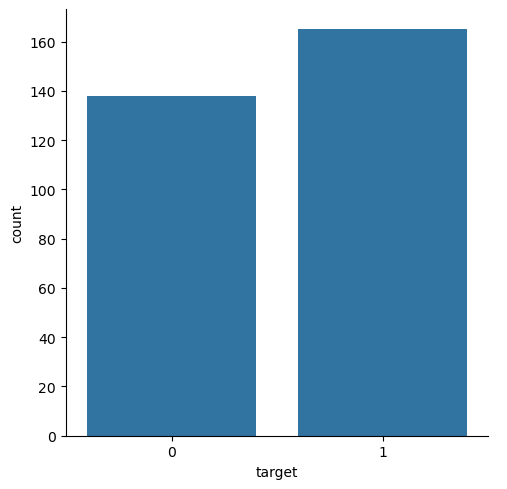

In [4]:
sns.catplot(x = "target", data = df, kind = "count")

<Axes: >

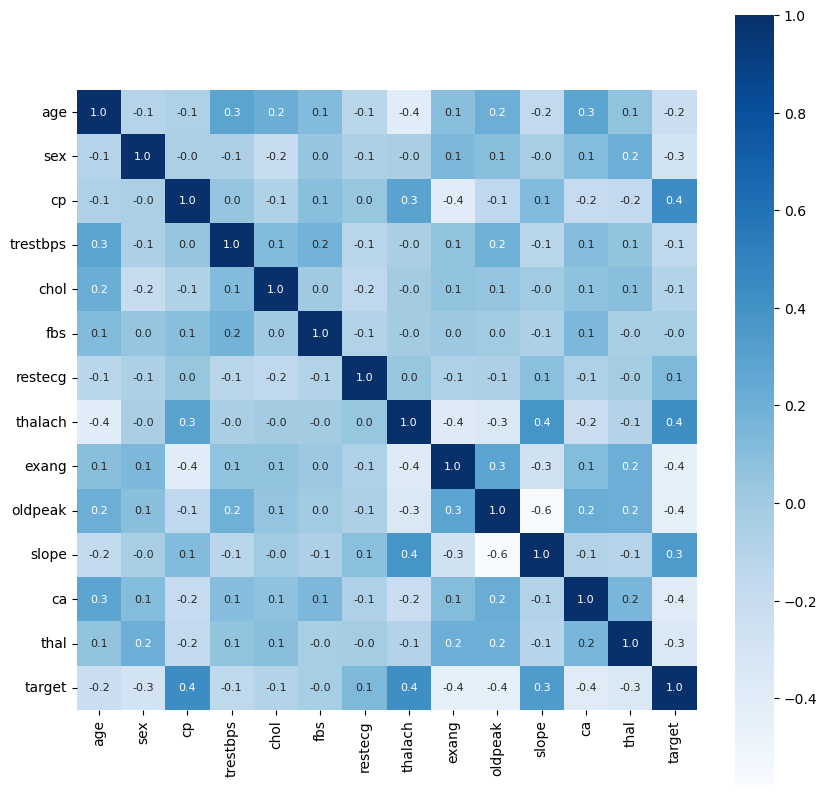

In [7]:
correlation = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar = True, square = True, fmt = ".1f", annot = True, annot_kws={"size":8}, cmap = "Blues")

In [10]:
x = df.drop("target", axis = 1)
y = df["target"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 2)

print(y.shape, y_train.shape, y_test.shape)

model = DecisionTreeClassifier()

model.fit(x_train, y_train)



(303,) (242,) (61,)


DecisionTreeClassifier()

In [13]:
x_train_pred = model.predict(x_train)

train_da = metrics.accuracy_score(y_train, x_train_pred)
print(train_da)




x_test_pred = model.predict(x_test)
test_da = metrics.accuracy_score(y_test, x_test_pred)
print(test_da)

1.0
0.8524590163934426


In [14]:
cm = metrics.confusion_matrix(y_test, x_test_pred)
print(cm)

[[24  8]
 [ 1 28]]


0.8615384615384616 0.9655172413793104 0.9655172413793104
              precision    recall  f1-score   support

           0       0.96      0.75      0.84        32
           1       0.78      0.97      0.86        29

    accuracy                           0.85        61
   macro avg       0.87      0.86      0.85        61
weighted avg       0.87      0.85      0.85        61



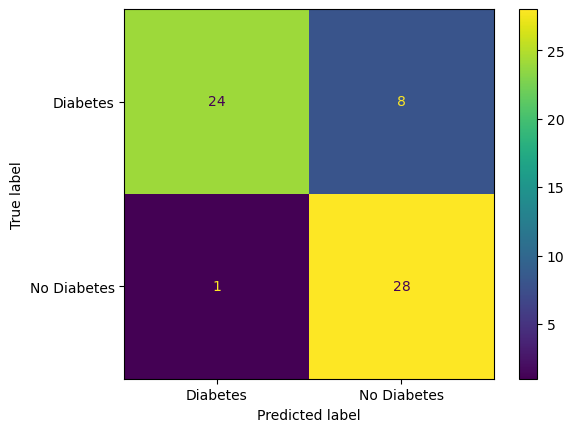

In [16]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ["Diabetes", "No Diabetes"])
disp.plot()

preds = x_test_pred
f1 = metrics.f1_score(y_test, preds)
recall = metrics.recall_score(y_test, preds)
jaccard = metrics.recall_score(y_test, preds)
print(f1, recall, jaccard)
print(metrics.classification_report(y_test, preds))
